In [1]:
import pandas as pd
import numpy as np

In [71]:
df = pd.read_csv("dirty_cafe_sales.csv")

In [72]:
df.head()


,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4,1.0,ERROR,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11


In [73]:
df.tail()


,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
9995,TXN_7672686,Coffee,2,2.0,4.0,NaN,UNKNOWN,2023-08-30
9996,TXN_9659401,NaN,3,NaN,3.0,Digital Wallet,NaN,2023-06-02
9997,TXN_5255387,Coffee,4,2.0,8.0,Digital Wallet,NaN,2023-03-02
9998,TXN_7695629,Cookie,3,NaN,3.0,Digital Wallet,NaN,2023-12-02
9999,TXN_6170729,Sandwich,3,4.0,12.0,Cash,In-store,2023-11-07


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    10000 non-null  object
 1   Item              9667 non-null   object
 2   Quantity          9862 non-null   object
 3   Price Per Unit    9821 non-null   object
 4   Total Spent       9827 non-null   object
 5   Payment Method    7421 non-null   object
 6   Location          6735 non-null   object
 7   Transaction Date  9841 non-null   object
dtypes: object(8)
memory usage: 625.1+ KB


In [18]:
df.isnull().sum()

Transaction ID        0
Item                  0
Quantity            138
Price Per Unit        0
Total Spent         173
Payment Method        0
Location              0
Transaction Date    159
dtype: int64

In [7]:
df.dropna()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4,1.0,ERROR,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11
...,...,...,...,...,...,...,...,...
9984,TXN_3142496,Smoothie,UNKNOWN,4.0,4.0,Cash,Takeaway,2023-07-27
9986,TXN_2858441,Sandwich,2,4.0,8.0,Credit Card,In-store,2023-12-14
9991,TXN_3897619,Sandwich,3,4.0,12.0,Cash,Takeaway,2023-02-24
9992,TXN_2739140,Smoothie,4,4.0,16.0,UNKNOWN,In-store,2023-07-05


In [8]:
#determining the kind of data it contains(dirty)
df["Quantity"].unique()


array(['2', '4', '5', '3', '1', 'ERROR', 'UNKNOWN', nan], dtype=object)

In [9]:
#converting the data type numeric
df["Quantity"] = pd.to_numeric(df["Quantity"], errors="coerce")


In [10]:
df["Quantity"].isnull().sum()

np.int64(479)

In [13]:
#converting to its own specific data types
df["Price Per Unit"] = pd.to_numeric(df["Price Per Unit"], errors="coerce")
df["Total Spent"] = pd.to_numeric(df["Total Spent"], errors="coerce")

In [16]:
df["Transaction Date"] = pd.to_datetime(df["Transaction Date"], errors="coerce")

In [18]:
df = df.dropna(subset=["Quantity"])

In [22]:
#Checking How Many Bad Values You Had
df["Quantity"].value_counts()

Quantity
5    2013
2    1974
4    1863
3    1849
1    1822
Name: count, dtype: int64

In [24]:
#checking duplicates
df.duplicated().sum()

np.int64(0)

In [25]:
#removing duplicates
df = df.drop_duplicates()

In [26]:
#checking strange categories
df["Payment Method"].value_counts()
df["Location"].value_counts()
df["Item"].value_counts()

Item
Juice       1124
Coffee      1104
Salad       1095
Cake        1093
Sandwich    1070
Smoothie    1052
Cookie      1039
Tea         1034
UNKNOWN      321
ERROR        274
Name: count, dtype: int64

In [27]:
df.head()


,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date,Calculated Total
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08,4.0
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16,12.0
2,TXN_4271903,Cookie,4,1.0,NaN,Credit Card,In-store,2023-07-19,4.0
3,TXN_7034554,Salad,2,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27,10.0
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11,4.0


In [28]:
df.tail()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date,Calculated Total
9995,TXN_7672686,Coffee,2,2.0,4.0,NaN,UNKNOWN,2023-08-30,4.0
9996,TXN_9659401,NaN,3,NaN,3.0,Digital Wallet,NaN,2023-06-02,NaN
9997,TXN_5255387,Coffee,4,2.0,8.0,Digital Wallet,NaN,2023-03-02,8.0
9998,TXN_7695629,Cookie,3,NaN,3.0,Digital Wallet,NaN,2023-12-02,NaN
9999,TXN_6170729,Sandwich,3,4.0,12.0,Cash,In-store,2023-11-07,12.0


In [29]:
df.fillna(0)

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date,Calculated Total
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08 00:00:00,4.0
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16 00:00:00,12.0
2,TXN_4271903,Cookie,4,1.0,0.0,Credit Card,In-store,2023-07-19 00:00:00,4.0
3,TXN_7034554,Salad,2,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27 00:00:00,10.0
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11 00:00:00,4.0
...,...,...,...,...,...,...,...,...,...
9995,TXN_7672686,Coffee,2,2.0,4.0,0,UNKNOWN,2023-08-30 00:00:00,4.0
9996,TXN_9659401,0,3,0.0,3.0,Digital Wallet,0,2023-06-02 00:00:00,0.0
9997,TXN_5255387,Coffee,4,2.0,8.0,Digital Wallet,0,2023-03-02 00:00:00,8.0
9998,TXN_7695629,Cookie,3,0.0,3.0,Digital Wallet,0,2023-12-02 00:00:00,0.0


In [30]:
df["Location"] = df["Location"].fillna(df["Location"].mode()[0])

In [31]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 9521 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    9521 non-null   object        
 1   Item              9206 non-null   object        
 2   Quantity          9521 non-null   int64         
 3   Price Per Unit    9006 non-null   float64       
 4   Total Spent       9039 non-null   float64       
 5   Payment Method    7074 non-null   object        
 6   Location          9521 non-null   object        
 7   Transaction Date  9086 non-null   datetime64[ns]
 8   Calculated Total  9006 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 743.8+ KB


In [32]:
df = df.dropna(subset=["Price Per Unit"])

In [33]:
df["Payment Method"] = df["Payment Method"].fillna("Unknown")

In [34]:
df = df.dropna(subset=["Item"])

In [35]:
df = df.dropna(subset=["Transaction Date"])

In [36]:
df.head()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date,Calculated Total
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08,4.0
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16,12.0
2,TXN_4271903,Cookie,4,1.0,NaN,Credit Card,In-store,2023-07-19,4.0
3,TXN_7034554,Salad,2,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27,10.0
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11,4.0


In [4]:
import pandas as pd


In [9]:
df.tail()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
9995,TXN_7672686,Coffee,2,2.0,4.0,NaN,UNKNOWN,2023-08-30
9996,TXN_9659401,NaN,3,NaN,3.0,Digital Wallet,NaN,2023-06-02
9997,TXN_5255387,Coffee,4,2.0,8.0,Digital Wallet,NaN,2023-03-02
9998,TXN_7695629,Cookie,3,NaN,3.0,Digital Wallet,NaN,2023-12-02
9999,TXN_6170729,Sandwich,3,4.0,12.0,Cash,In-store,2023-11-07


In [11]:
df["Item"] = df["Item"].fillna("Smoothie")

In [12]:
df.tail()


,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
9995,TXN_7672686,Coffee,2,2.0,4.0,NaN,UNKNOWN,2023-08-30
9996,TXN_9659401,Smoothie,3,NaN,3.0,Digital Wallet,NaN,2023-06-02
9997,TXN_5255387,Coffee,4,2.0,8.0,Digital Wallet,NaN,2023-03-02
9998,TXN_7695629,Cookie,3,NaN,3.0,Digital Wallet,NaN,2023-12-02
9999,TXN_6170729,Sandwich,3,4.0,12.0,Cash,In-store,2023-11-07


In [14]:
df["Price Per Unit"] = df["Price Per Unit"].fillna("3.0")
df["Payment Method"] = df["Payment Method"].fillna("Debit card")
df["Location"] = df["Location"].fillna("DownTown")

In [15]:
df.head()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4,1.0,ERROR,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11


In [16]:
df.tail()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
9995,TXN_7672686,Coffee,2,2.0,4.0,Debit card,UNKNOWN,2023-08-30
9996,TXN_9659401,Smoothie,3,3.0,3.0,Digital Wallet,DownTown,2023-06-02
9997,TXN_5255387,Coffee,4,2.0,8.0,Digital Wallet,DownTown,2023-03-02
9998,TXN_7695629,Cookie,3,3.0,3.0,Digital Wallet,DownTown,2023-12-02
9999,TXN_6170729,Sandwich,3,4.0,12.0,Cash,In-store,2023-11-07


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    10000 non-null  object
 1   Item              10000 non-null  object
 2   Quantity          9862 non-null   object
 3   Price Per Unit    10000 non-null  object
 4   Total Spent       9827 non-null   object
 5   Payment Method    10000 non-null  object
 6   Location          10000 non-null  object
 7   Transaction Date  9841 non-null   object
dtypes: object(8)
memory usage: 625.1+ KB


In [19]:
df.dropna()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4,1.0,ERROR,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11
...,...,...,...,...,...,...,...,...
9995,TXN_7672686,Coffee,2,2.0,4.0,Debit card,UNKNOWN,2023-08-30
9996,TXN_9659401,Smoothie,3,3.0,3.0,Digital Wallet,DownTown,2023-06-02
9997,TXN_5255387,Coffee,4,2.0,8.0,Digital Wallet,DownTown,2023-03-02
9998,TXN_7695629,Cookie,3,3.0,3.0,Digital Wallet,DownTown,2023-12-02


In [20]:
df.isnull().sum()

Transaction ID        0
Item                  0
Quantity            138
Price Per Unit        0
Total Spent         173
Payment Method        0
Location              0
Transaction Date    159
dtype: int64

In [21]:
df["Quantity"] = df["Quantity"].fillna("2")

In [22]:
df['Total Spent'].isnull().sum()

np.int64(173)

In [30]:
df[["Quantity", "Price Per Unit"]].dtypes

Quantity          object
Price Per Unit    object
dtype: object

In [31]:
df["Price Per Unit"] = pd.to_numeric(df["Price Per Unit"], errors="coerce")

In [32]:
df["Quantity"] = pd.to_numeric(df["Quantity"], errors="coerce")

In [33]:
df[["Quantity", "Price Per Unit"]].dtypes

Quantity          float64
Price Per Unit    float64
dtype: object

In [34]:
df.dropna()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2.0,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4.0,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4.0,1.0,ERROR,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2.0,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2.0,2.0,4.0,Digital Wallet,In-store,2023-06-11
...,...,...,...,...,...,...,...,...
9995,TXN_7672686,Coffee,2.0,2.0,4.0,Debit card,UNKNOWN,2023-08-30
9996,TXN_9659401,Smoothie,3.0,3.0,3.0,Digital Wallet,DownTown,2023-06-02
9997,TXN_5255387,Coffee,4.0,2.0,8.0,Digital Wallet,DownTown,2023-03-02
9998,TXN_7695629,Cookie,3.0,3.0,3.0,Digital Wallet,DownTown,2023-12-02


In [37]:
df.head()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2.0,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4.0,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4.0,1.0,4.0,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2.0,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2.0,2.0,4.0,Digital Wallet,In-store,2023-06-11


In [ ]:
df["Payment Method"] = df["Payment Method"].replace("UNKNOWN", "Debit Card")
df["Location"] = df["Location"].replace("UNKNOWN", "Uptown")

In [38]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    10000 non-null  object 
 1   Item              10000 non-null  object 
 2   Quantity          9659 non-null   float64
 3   Price Per Unit    9646 non-null   float64
 4   Total Spent       9312 non-null   float64
 5   Payment Method    10000 non-null  object 
 6   Location          10000 non-null  object 
 7   Transaction Date  9841 non-null   object 
dtypes: float64(3), object(5)
memory usage: 625.1+ KB


In [39]:
df["Total Spent"].isnull().sum()

np.int64(688)

In [42]:
df[["Quantity", "Price Per Unit"]].isnull().sum()

Quantity          341
Price Per Unit    354
dtype: int64

In [47]:
df = df.dropna(subset=["Quantity", "Price Per Unit"])

In [56]:
df["Total Spent"].isnull().sum()

np.int64(0)

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9312 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    9312 non-null   object 
 1   Item              9312 non-null   object 
 2   Quantity          9312 non-null   float64
 3   Price Per Unit    9312 non-null   float64
 4   Total Spent       9312 non-null   float64
 5   Payment Method    9312 non-null   object 
 6   Location          9312 non-null   object 
 7   Transaction Date  9167 non-null   object 
dtypes: float64(3), object(5)
memory usage: 654.8+ KB


In [58]:
df.describe()

,Quantity,Price Per Unit,Total Spent
count,9312.000000,9312.000000,9312.000000
mean,3.013316,2.950924,8.904800
std,1.413163,1.265886,5.943455
min,1.000000,1.000000,1.000000
25%,2.000000,2.000000,4.000000
50%,3.000000,3.000000,8.000000
75%,4.000000,4.000000,12.000000
max,5.000000,5.000000,25.000000


In [59]:
df.isnull().sum()

Transaction ID        0
Item                  0
Quantity              0
Price Per Unit        0
Total Spent           0
Payment Method        0
Location              0
Transaction Date    145
dtype: int64

In [62]:
df["Transaction Date"].isnull().sum()

np.int64(426)

In [63]:
df["Transaction Date"].dtype

dtype('<M8[ns]')

In [64]:
df = df.dropna(subset=["Transaction Date"])

In [65]:
df["Transaction Date"].isnull().sum()

np.int64(0)

In [66]:
df.isnull().sum()

Transaction ID      0
Item                0
Quantity            0
Price Per Unit      0
Total Spent         0
Payment Method      0
Location            0
Transaction Date    0
dtype: int64

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8886 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    8886 non-null   object        
 1   Item              8886 non-null   object        
 2   Quantity          8886 non-null   float64       
 3   Price Per Unit    8886 non-null   float64       
 4   Total Spent       8886 non-null   float64       
 5   Payment Method    8886 non-null   object        
 6   Location          8886 non-null   object        
 7   Transaction Date  8886 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 624.8+ KB


In [68]:
df.duplicated().sum()

np.int64(0)

In [69]:
df.describe()

,Quantity,Price Per Unit,Total Spent,Transaction Date
count,8886.000000,8886.000000,8886.000000,8886
mean,3.010241,2.950596,8.890783,2023-07-01 23:52:23.011478784
min,1.000000,1.000000,1.000000,2023-01-01 00:00:00
25%,2.000000,2.000000,4.000000,2023-04-01 00:00:00
50%,3.000000,3.000000,8.000000,2023-07-02 00:00:00
75%,4.000000,4.000000,12.000000,2023-10-02 00:00:00
max,5.000000,5.000000,25.000000,2023-12-31 00:00:00
std,1.411986,1.265503,5.938180,NaN


In [74]:
   #DATA VISUALIZATIONS
df.shape

(10000, 8)

In [82]:
#TOTAL REVENUE
df.columns

Index(['Transaction ID', 'Item', 'Quantity', 'Price Per Unit', 'Total Spent',
       'Payment Method', 'Location', 'Transaction Date'],
      dtype='object')

In [83]:
df.columns = df.columns.str.strip()

In [84]:
df.columns

Index(['Transaction ID', 'Item', 'Quantity', 'Price Per Unit', 'Total Spent',
       'Payment Method', 'Location', 'Transaction Date'],
      dtype='object')

In [86]:
df["Total Spent"].dtype

dtype('O')

In [87]:
df["Total Spent"] = pd.to_numeric(df["Total Spent"], errors="coerce")

In [88]:
df["Total Spent"].dtype

dtype('float64')

In [89]:
df["Total Spent"].sum()

np.float64(84763.5)

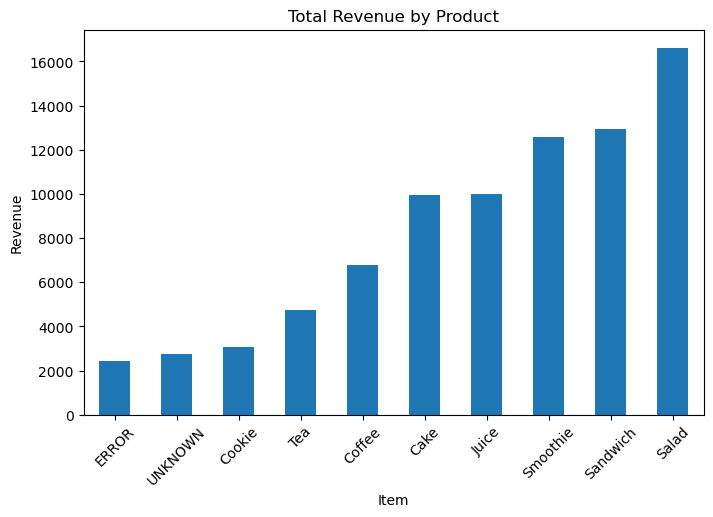

In [105]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
df.groupby("Item")["Total Spent"].sum().sort_values().plot(kind="bar")

plt.title("Total Revenue by Product")
plt.xlabel("Item")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.show()

In [94]:
Total_revenue = df["Total Spent"].sum()
print("Total Revenue:", Total_revenue)

Total Revenue: 84763.5


In [95]:
avg_order = df["Total Spent"].mean()
print("Average Order Value:", avg_order)

Average Order Value: 8.924352495262161


In [102]:
df[df["Item"] == "ERROR"].shape

(292, 8)

In [109]:
#converting the data type
df["Transaction Date"] = pd.to_datetime(df["Transaction Date"], errors="coerce")

In [110]:
df["Transaction Date"].dtype

dtype('<M8[ns]')

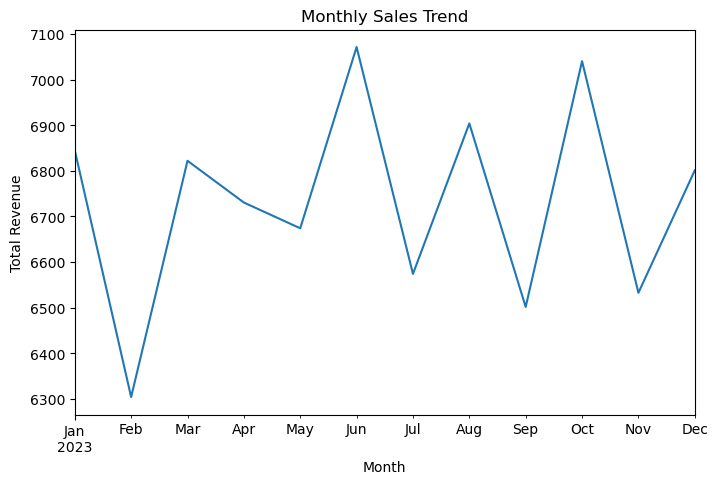

In [112]:
#monthly Sales Trend
import matplotlib.pyplot as plt
monthly_sales = df.resample("ME", on="Transaction Date")["Total Spent"].sum()
plt.figure (figsize=(8,5))
monthly_sales.plot(kind="line")

plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Revenue")
plt.show()

In [113]:
df["Total Spent"].describe()

count    9498.000000
mean        8.924352
std         6.009919
min         1.000000
25%         4.000000
50%         8.000000
75%        12.000000
max        25.000000
Name: Total Spent, dtype: float64

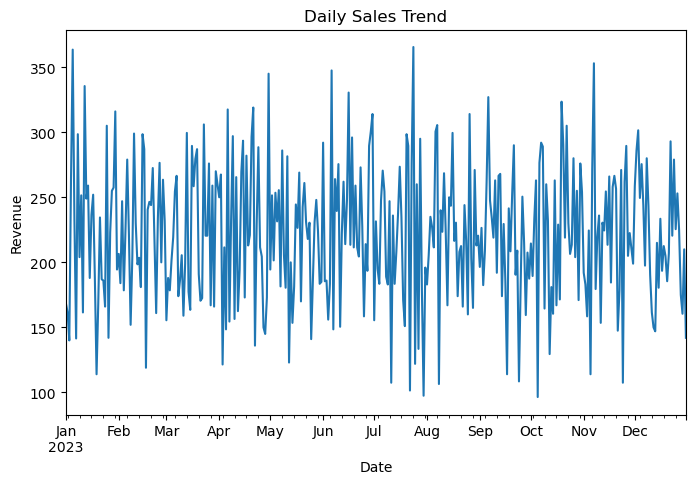

In [115]:
#daily Trend 
daily_sales = df.groupby("Transaction Date")["Total Spent"].sum()
plt.figure(figsize=(8,5))
daily_sales.plot(kind="line")

plt.title("Daily Sales Trend")
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.show()